In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Swiggy.csv")

In [4]:
df.head(2)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json


## Data Cleaning
1. Remove null rows
2. Check duplicate rows, if there exist the same remove them.
3. Dropped column which are not required for analysis.
4. Check, DO we have any product id twice?
5. Convert rating column into float from object.
6. Find out the numeric cost from cost column.

In [5]:
df.shape

(148541, 11)

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [8]:
df.shape

(148255, 11)

In [9]:
df = df.drop_duplicates()

Since size is same after removing duplicate rows so that means there were no duplicate rows.

In [10]:
df.drop("menu", axis = 1, inplace = True)

In [11]:
df["id"].value_counts(ascending = False)

567335    1
408389    1
574736    1
418194    1
511159    1
         ..
501726    1
395812    1
467993    1
89964     1
447770    1
Name: id, Length: 148255, dtype: int64

There is no product id twice.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148255 entries, 0 to 148540
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148255 non-null  int64 
 1   name          148255 non-null  object
 2   city          148255 non-null  object
 3   rating        148255 non-null  object
 4   rating_count  148255 non-null  object
 5   cost          148255 non-null  object
 6   cuisine       148255 non-null  object
 7   lic_no        148255 non-null  object
 8   link          148255 non-null  object
 9   address       148255 non-null  object
dtypes: int64(1), object(9)
memory usage: 12.4+ MB


In [13]:
df["rating_count"].value_counts()

Too Few Ratings    86912
20+ ratings        21604
100+ ratings       20514
50+ ratings        11985
500+ ratings        4390
1K+ ratings         2737
5K+ ratings           98
10K+ ratings          15
Name: rating_count, dtype: int64

In [14]:
df["rating"] = df["rating"].replace("--",0).astype(float)

In [15]:
df["numeric_cost"]=df["cost"].str.extract('(\d+)').astype(int)

In [16]:
df["id"]=df["id"].astype(object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148255 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148255 non-null  object 
 1   name          148255 non-null  object 
 2   city          148255 non-null  object 
 3   rating        148255 non-null  float64
 4   rating_count  148255 non-null  object 
 5   cost          148255 non-null  object 
 6   cuisine       148255 non-null  object 
 7   lic_no        148255 non-null  object 
 8   link          148255 non-null  object 
 9   address       148255 non-null  object 
 10  numeric_cost  148255 non-null  int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 13.0+ MB


# Data Analysis
1. Top 5 cities in number of restaurants of swiggy.
2. Top 5 restaurants which have longest chain.
3. Number of cities(including subregions and excluding subregions) where swiggy is having their restaurants listed
4. Which restaurant in Banglore has the most number of people visited(take a number of reviews for reference)
5. Popular Cuisine overall and popular cuisine according to city


In [18]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,numeric_cost
0,567335,AB FOODS POINT,Abohar,0.0,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",200
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",200
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",100
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",250
4,543530,GRILL MASTERS,Abohar,0.0,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",250


In [19]:
df["city"].value_counts()

Bikaner                 1665
Noida-1                 1424
Indirapuram,Delhi       1279
BTM,Bangalore           1159
Rohini,Delhi            1135
                        ... 
Alwarpet,Chennai           1
Naharlagun                 1
Mahim Dadar,Mumbai         1
Starbucks_BKC,Mumbai       1
Rangpo                     1
Name: city, Length: 821, dtype: int64

## 1.Top 5 cities in number of restaurants on swiggy
1. Bikaner
2. Noida-1
3. Indirapuram,Delhi
4. BTM, Bangalore
5. Rohini, Delhi

In [20]:
df["name"].value_counts()

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
                                                  ... 
Azad Chicken Point                                   1
Punjab de paranthe                                   1
delhi 6 Chicken Point                                1
Mirch Masala by Chauhan Sahab                        1
Lazeez kitchen                                       1
Name: name, Length: 112683, dtype: int64

## 2. Top 5 restaurants which have longest chain
1. Domino's Pizza
2. Pizza Hut
3. KFC
4. Kwality Walls Frozen Dessert and Ice Cream Shop
5. Baskin Robbins

There are 112683 different restaurants on swiggy.

<AxesSubplot: >

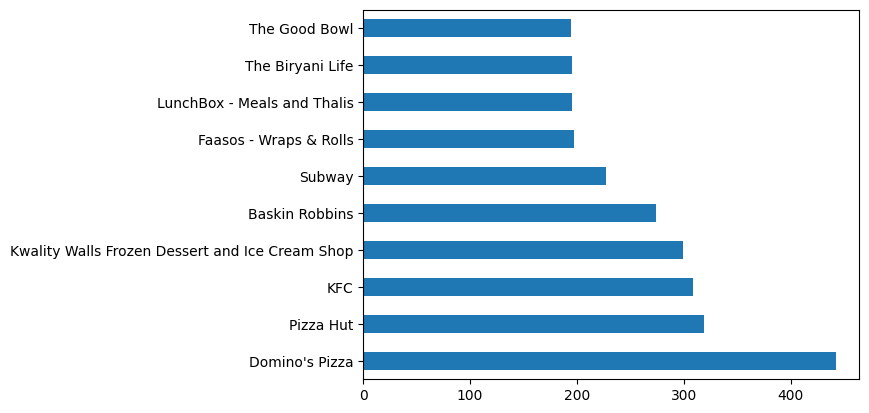

In [21]:
df["name"].value_counts().head(10).plot(kind = "barh")

In [22]:
top5 = df["name"].value_counts().head(5)

In [23]:
df[df["name"].isin(top5.index)]["cuisine"].unique()

array(['Pizzas', 'Desserts', 'American,Snacks', 'Desserts,Ice Cream',
       'Ice Cream', 'Pizzas,Fast Food', 'Fast Food,Pizzas',
       'Ice Cream,Desserts', 'Pizzas,Snacks', 'Ice Cream,Beverages',
       'Indian', 'Desserts,Sweets', 'American', 'Beverages,Desserts',
       'Ice Cream,Bakery', 'North Indian,Desserts', 'Beverages,Ice Cream',
       'Desserts,Beverages', 'Pizzas,Desserts', 'North Indian',
       'Italian,Pizzas', 'Pizzas,Beverages', 'Pizzas,American'],
      dtype=object)

**Top 5 brands have cuisines mainly Pizzas and IceCream.**

## 3.Number of cities(including subregions and excluding subregions) where swiggy is having their restaurants listed 

In [24]:
Number_of_cities_including_subregions =len(df["city"].unique())
Number_of_cities_including_subregions

821

In [25]:
subregions = df["city"].unique()

In [26]:
city = []
for i in subregions:
    if(i.count(",")>0):
        city.append(i.split(",")[1])
    else:
        city.append(i)       

In [27]:
city = set(city)

In [28]:
len(city)

554

**There are 821 cities including subregions and 554 cities excluding subregions**

## Restaurant with maximum rating in each city

In [29]:
df.groupby("city").max("rating").reset_index()

,city,rating,numeric_cost
0,"Abids & Koti,Hyderabad",5.0,1700
1,Abohar,4.7,700
2,"Adajan,Surat",4.8,800
3,Adilabad,4.0,400
4,Adityapur,4.8,1000
...,...,...,...
816,Yavatmal,4.7,400
817,"Yelahanka,Bangalore",5.0,2022
818,"Yeshwanthpur,Bangalore",4.8,1500
819,"Zirakpur,Chandigarh",4.8,1200


In [30]:
df[df["city"]=="Abohar"].max()

id                                                         573656
name                                                    yummy hub
city                                                       Abohar
rating                                                        4.7
rating_count                                      Too Few Ratings
cost                                                        ₹ 700
cuisine                                                   Tandoor
lic_no                                                    license
link            https://www.swiggy.com/restaurants/yummy-hub-c...
address         yummy hub, hanumangarh road near dr naveen set...
numeric_cost                                                  700
dtype: object

## 4. Which restaurant in Banglore has the most number of people visited(take a number of reviews for reference)?

In [31]:
df.head(2)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,numeric_cost
0,567335,AB FOODS POINT,Abohar,0.0,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",200
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",200


In [32]:
Bangalore_rows = df[df["city"].str.contains("Bangalore")]

In [33]:
Bangalore_rows["rating_count"].value_counts()

Too Few Ratings    8090
100+ ratings       2360
20+ ratings        2233
50+ ratings        1273
500+ ratings        615
1K+ ratings         349
5K+ ratings           9
Name: rating_count, dtype: int64

In [34]:
Bangalore_max_people_visited = Bangalore_rows[Bangalore_rows["rating_count"]=="5K+ ratings"]

## 5. Popular Cuisine overall and popular cuisine according to city

In [35]:
len(df["cuisine"].unique())

2131

In [36]:
df["cuisine"].str.split(",")

0                   [Beverages, Pizzas]
1                      [Sweets, Bakery]
2                           [Beverages]
3                   [Fast Food, Indian]
4         [Italian-American, Fast Food]
                      ...              
148536              [Fast Food, Snacks]
148537                         [Pizzas]
148538              [Fast Food, Snacks]
148539                    [Continental]
148540                         [Pizzas]
Name: cuisine, Length: 148255, dtype: object

In [37]:
df["cuisine"].value_counts()

North Indian,Chinese         6463
Indian                       6399
Chinese                      5045
North Indian                 4764
Indian,Chinese               4368
                             ... 
Italian,Middle Eastern          1
Jain,Desserts                   1
British,Fast Food               1
Keto,Asian                      1
Barbecue,Italian-American       1
Name: cuisine, Length: 2131, dtype: int64